In [101]:
#loading some stuff 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle
import datetime
from random import randrange

In [102]:
#setting system path
import sys
sys.path.append('/home/tobias/data/')
base_path = '/home/tobias/data/'

##setting system path
#import sys
#sys.path.append('c:/Users/tpiechowiak/Documents/BEAR/GNOS/sws_machine_learning/')
#base_path = 'c:/Users/tpiechowiak/OneDrive - GN Store Nord/GNOS data/'

In [103]:
#now loading all the necessary data files
with open(base_path + "hi_id_ADL_before_return.pkl", "rb") as input_file:
    hi_ADL = pickle.load(input_file)
print("Read hi ids data from pickle file")

with open(base_path + "resampled_last_ADL_before_return.pkl", "rb") as input_file:
    adl_ = pickle.load(input_file)
print("Read resampled data from pickle file")

Read hi ids data from pickle file
Read resampled data from pickle file


In [104]:
adl_.keys()

Index([&#39;ADLProperties_TotalUseTime&#39;, &#39;ADLProperties_NumberOfDeviceBoots&#39;,
       &#39;ADLProperties_NumberOfPowerDowns&#39;,
       &#39;ADLProperties_NumberOfPresetSwitches&#39;,
       &#39;ADLProperties_MeanVolumeControlLevelPerPreset_0&#39;,
       &#39;ADLProperties_HistogramOnInputPowerPreset1_0&#39;,
       &#39;ADLProperties_HistogramOnInputPowerPreset1_1&#39;,
       &#39;ADLProperties_HistogramOnInputPowerPreset1_2&#39;,
       &#39;ADLProperties_HistogramOnInputPowerPreset1_3&#39;,
       &#39;ADLProperties_HistogramOnInputPowerPreset1_4&#39;,
       &#39;ADLProperties_HistogramOnInputPowerPreset1_5&#39;,
       &#39;ADLProperties_HistogramOnInputPowerPreset1_6&#39;,
       &#39;ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_0&#39;,
       &#39;ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_1&#39;,
       &#39;ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_2&#39;,
       &#39;ADLProperties_HistogramOnClassifiedEnvironmentPerPr

In [105]:
adl_['ADLProperties_MeanVolumeControlLevelPerPreset_0']

ADLRawData_CreationTime
2019-01-27   -0.009760
2019-02-03   -0.009760
2019-02-10    0.039960
2019-02-17    0.039960
2019-02-24   -0.002519
                ...   
2020-02-02    0.000682
2020-02-09    0.000229
2020-02-16    0.000337
2020-02-23    0.000337
2020-03-01   -0.000396
Name: ADLProperties_MeanVolumeControlLevelPerPreset_0, Length: 3258070, dtype: float64

In [106]:
#now create category of isVolumenChange
adl_['isVolumeChange'] = 0
adl_.loc[adl_['ADLProperties_MeanVolumeControlLevelPerPreset_0'].diff() != 0,'isVolumeChange'] = 1

In [107]:
plot_data_1 = []
plot_data_2 = []
plot_data_3 = []
plot_data_4 = []
plot_data_5 = []
plot_data_6 = []
plot_data_7 = []
plot_data_8 = []
plot_data_9 = []
plot_data_10 = []
plot_data_11 = []
plot_data_12 = []
plot_data_13 = []
plot_data_14 = []
plot_data_15 = []
plot_data_16 = []
plot_data_17 = []
plot_data_18 = []
plot_data_19 = []

class_ = []
cnt = 0 
nrWeeks = 12
#now prepare the numpy for plotting the data 
for hi_id, group in adl_.groupby('ADLRawData_HearingInstrumentId'):
    if (cnt%1000 == 0):
        print(cnt)
    
    if (hi_id in hi_ADL):
    
        tmp1 = group['ADLProperties_TotalUseTime'].iloc[-nrWeeks:].values     
        tmp2 = group['ADLProperties_NumberOfPresetSwitches'].iloc[-nrWeeks:].values    
        tmp3 = group['ADLProperties_NumberOfPowerDowns'].iloc[-nrWeeks:].values
        tmp4 = group['MeanVolume'].iloc[-nrWeeks:].values
        tmp5 = group['ADLProperties_NumberOfDeviceBoots'].iloc[-nrWeeks:].values
        tmp6 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_0'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp7 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_1'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp8 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_2'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp9 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_3'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp10 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_4'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp11 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_5'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp12 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_6'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp13 = group['ADLProperties_HistogramOnInputPowerPreset1_0'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp14 = group['ADLProperties_HistogramOnInputPowerPreset1_1'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp15 = group['ADLProperties_HistogramOnInputPowerPreset1_2'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp16 = group['ADLProperties_HistogramOnInputPowerPreset1_3'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp17 = group['ADLProperties_HistogramOnInputPowerPreset1_4'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp18 = group['ADLProperties_HistogramOnInputPowerPreset1_5'].iloc[-nrWeeks:].values / tmp1 * 100
        tmp19 = group['ADLProperties_HistogramOnInputPowerPreset1_6'].iloc[-nrWeeks:].values / tmp1 * 100

    else:
        rnd = randrange(group.shape[0] - nrWeeks)
        tmp1 = group['ADLProperties_TotalUseTime'].iloc[rnd:rnd + nrWeeks].values     
        tmp2 = group['ADLProperties_NumberOfPresetSwitches'].iloc[rnd:rnd + nrWeeks].values    
        tmp3 = group['ADLProperties_NumberOfPowerDowns'].iloc[rnd:rnd + nrWeeks].values
        tmp4 = group['MeanVolume'].iloc[rnd:rnd + nrWeeks].values
        tmp5 = group['ADLProperties_NumberOfDeviceBoots'].iloc[rnd:rnd + nrWeeks].values
        tmp6 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_0'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp7 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_1'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp8 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_2'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp9 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_3'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp10 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_4'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp11 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_5'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp12 = group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_6'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp13 = group['ADLProperties_HistogramOnInputPowerPreset1_0'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp14 = group['ADLProperties_HistogramOnInputPowerPreset1_1'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp15 = group['ADLProperties_HistogramOnInputPowerPreset1_2'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp16 = group['ADLProperties_HistogramOnInputPowerPreset1_3'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp17 = group['ADLProperties_HistogramOnInputPowerPreset1_4'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp18 = group['ADLProperties_HistogramOnInputPowerPreset1_5'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100
        tmp19 = group['ADLProperties_HistogramOnInputPowerPreset1_6'].iloc[rnd:rnd + nrWeeks].values / tmp1 * 100        


    #use time 
    if (tmp1.shape[0] != 12):
        continue
        
    if(np.any(tmp1 < 0)):
        continue
                
    if(np.any(tmp1 > 24)):
        continue
    
    #prests
    if (tmp2.shape[0] != 12):
        continue
        
    if(np.any(tmp2 < 0)):
        continue
                
    if(np.any(tmp2 > 1000)):
        continue
    
    #power downs 
    if (tmp3.shape[0] != 12):
        continue
        
    if(np.any(tmp3 < 0)):
        continue
                
    if(np.any(tmp3 > 1000)):
        continue
    
    #volume change 
    if (tmp4.shape[0] != 12):
        continue
        
    if(np.any(tmp4 < -100)):
        continue
                
    if(np.any(tmp4 > 100)):
        continue
    
    #re-boots 
    if (tmp5.shape[0] != 12):
        continue
        
    if(np.any(tmp5 < 0)):
        continue
                
    if(np.any(tmp5 > 1000)):
        continue
    
    #env 0
    if (tmp6.shape[0] != 12):
        continue
        
    if(np.any(tmp6 < 0)):
        continue
                
    if(np.any(tmp6 > 100)):
        continue

    #env1 
    if (tmp7.shape[0] != 12):
        continue
        
    if(np.any(tmp7 < 0)):
        continue
                
    if(np.any(tmp7 > 100)):
        continue

    #env2
    if (tmp8.shape[0] != 12):
        continue
        
    if(np.any(tmp8 < 0)):
        continue
                
    if(np.any(tmp8 > 100)):
        continue

    #env3
    if (tmp9.shape[0] != 12):
        continue
        
    if(np.any(tmp9 < 0)):
        continue
                
    if(np.any(tmp9 > 100)):
        continue

    #env4
    if (tmp10.shape[0] != 12):
        continue
        
    if(np.any(tmp10 < 0)):
        continue
                
    if(np.any(tmp10 > 100)):
        continue

    #env5
    if (tmp11.shape[0] != 12):
        continue
        
    if(np.any(tmp11 < 0)):
        continue
                
    if(np.any(tmp11 > 100)):
        continue

    #env6
    if (tmp12.shape[0] != 12):
        continue
        
    if(np.any(tmp12 < 0)):
        continue
                
    if(np.any(tmp12 > 100)):
        continue

    #inp0
    if (tmp13.shape[0] != 12):
        continue
        
    if(np.any(tmp13 < 0)):
        continue
                
    if(np.any(tmp13 > 100)):
        continue

    #inp1
    if (tmp14.shape[0] != 12):
        continue
        
    if(np.any(tmp14 < 0)):
        continue
                
    if(np.any(tmp14 > 100)):
        continue

    #inp2
    if (tmp15.shape[0] != 12):
        continue
        
    if(np.any(tmp15 < 0)):
        continue
                
    if(np.any(tmp15 > 100)):
        continue

    #inp3
    if (tmp16.shape[0] != 12):
        continue
        
    if(np.any(tmp16 < 0)):
        continue
                
    if(np.any(tmp16 > 100)):
        continue

    #inp4
    if (tmp17.shape[0] != 12):
        continue
        
    if(np.any(tmp17 < 0)):
        continue
                
    if(np.any(tmp17 > 100)):
        continue


    #inp5
    if (tmp18.shape[0] != 12):
        continue
        
    if(np.any(tmp18 < 0)):
        continue
                
    if(np.any(tmp18 > 100)):
        continue

    #inp6
    if (tmp19.shape[0] != 12):
        continue
        
    if(np.any(tmp19 < 0)):
        continue
                
    if(np.any(tmp19 > 100)):
        continue


        


    plot_data_1.append(tmp1)
    plot_data_2.append(tmp2)
    plot_data_3.append(tmp3)
    plot_data_4.append(tmp4)
    plot_data_5.append(tmp5)
    plot_data_6.append(tmp6)
    plot_data_7.append(tmp7)
    plot_data_8.append(tmp8)
    plot_data_9.append(tmp9)
    plot_data_10.append(tmp10)
    plot_data_11.append(tmp11)
    plot_data_12.append(tmp12)
    plot_data_13.append(tmp13)
    plot_data_14.append(tmp14)
    plot_data_15.append(tmp15)
    plot_data_16.append(tmp16)
    plot_data_17.append(tmp17)
    plot_data_18.append(tmp18)
    plot_data_19.append(tmp19)
            
    class_.append(group['class'].iloc[0])
    cnt += 1    
    
plot_data_1 = np.array(plot_data_1)
plot_data_2 = np.array(plot_data_2)
plot_data_3 = np.array(plot_data_3)
plot_data_4 = np.array(plot_data_4)
plot_data_5 = np.array(plot_data_5)
plot_data_6 = np.array(plot_data_6)
plot_data_7 = np.array(plot_data_7)
plot_data_8 = np.array(plot_data_8)
plot_data_9 = np.array(plot_data_9)
plot_data_10 = np.array(plot_data_10)
plot_data_11 = np.array(plot_data_11)
plot_data_12 = np.array(plot_data_12)
plot_data_13 = np.array(plot_data_13)
plot_data_14 = np.array(plot_data_14)
plot_data_15 = np.array(plot_data_15)
plot_data_16 = np.array(plot_data_16)
plot_data_17 = np.array(plot_data_17)
plot_data_18 = np.array(plot_data_18)
plot_data_19 = np.array(plot_data_19)


class_labels_array = np.array(class_)

0
1000
2000
3000
3000
4000
5000
6000
7000
8000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
19000
20000
21000
22000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
33000
34000
34000
35000
36000
37000
37000


In [108]:
tmp8

array([13.453572  ,  8.9620578 ,  5.7999775 ,  5.7999775 , 12.34021982,
        5.51876994,  6.79457469,  6.79457469,  7.12377328,  3.90828557,
        3.90828557,  8.63052537])

In [109]:

from sklearn.utils import resample

#now we need to get the right shape for the CNN 
nr_samples_majority = 4000
nr_samples_minority = 4000

####resample data for use-time

# Upsample minority class
minority_upsampled = resample(plot_data_1[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_1[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_1_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)

####resample data for preset changes

# Upsample minority class 
minority_upsampled = resample(plot_data_2[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_2[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_2_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)

####resample data for power downs

# Upsample minority class 
minority_upsampled = resample(plot_data_3[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_3[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_3_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)

####resample volume change

# Upsample minority class 
minority_upsampled = resample(plot_data_4[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_4[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results


plot_data_4_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)

####resample re-boots

# Upsample minority class 
minority_upsampled = resample(plot_data_5[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_5[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_5_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample env0

# Upsample minority class 
minority_upsampled = resample(plot_data_6[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_6[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_6_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample env1

# Upsample minority class 
minority_upsampled = resample(plot_data_7[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_7[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_7_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample env2

# Upsample minority class 
minority_upsampled = resample(plot_data_8[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_8[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_8_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample env3

# Upsample minority class 
minority_upsampled = resample(plot_data_9[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_9[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_9_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample env4

# Upsample minority class 
minority_upsampled = resample(plot_data_10[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_10[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_10_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample env5

# Upsample minority class 
minority_upsampled = resample(plot_data_11[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_11[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_11_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample env6

# Upsample minority class 
minority_upsampled = resample(plot_data_12[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_12[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_12_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample inp0

# Upsample minority class 
minority_upsampled = resample(plot_data_13[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_13[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_13_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample inp1

# Upsample minority class 
minority_upsampled = resample(plot_data_14[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_14[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_14_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample inp2

# Upsample minority class 
minority_upsampled = resample(plot_data_15[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_15[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_15_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample inp3

# Upsample minority class 
minority_upsampled = resample(plot_data_16[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_16[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_16_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample inp4

# Upsample minority class 
minority_upsampled = resample(plot_data_17[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_17[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_17_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample inp5

# Upsample minority class 
minority_upsampled = resample(plot_data_18[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_18[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_18_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)


####resample inp6

# Upsample minority class 
minority_upsampled = resample(plot_data_19[class_labels_array == 1,:], 
                                 replace=True,     # sample with replacement
                                 n_samples=nr_samples_minority, 
                                 random_state=42) # reproducible results
# Downsample majority class
majority_downsampled = resample(plot_data_19[class_labels_array == 0,:], 
                                 replace=False,     # sample with replacement
                                 n_samples=nr_samples_majority, 
                                 random_state=42) # reproducible results

plot_data_19_ = np.concatenate([minority_upsampled, majority_downsampled],axis = 0)



class_labels_array_ = np.concatenate([np.ones(nr_samples_minority), np.zeros(nr_samples_majority)], axis = 0)


In [110]:
mean1 = {}
mean2 = {}
std1 = {}
std2 = {}

mean1[0] = plot_data_1_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[0] = plot_data_1_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[0] = plot_data_1_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[0] = plot_data_1_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[1] = plot_data_2_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[1] = plot_data_2_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[1] = plot_data_2_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[1] = plot_data_2_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[2] = plot_data_3_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[2] = plot_data_3_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[2] = plot_data_3_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[2] = plot_data_3_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[3] = plot_data_4_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[3] = plot_data_4_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[3] = plot_data_4_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[3] = plot_data_4_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[4] = plot_data_5_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[4] = plot_data_5_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[4] = plot_data_5_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[4] = plot_data_5_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[5] = plot_data_6_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[5] = plot_data_6_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[5] = plot_data_6_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[5] = plot_data_6_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[6] = plot_data_7_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[6] = plot_data_7_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[6] = plot_data_7_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[6] = plot_data_7_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[7] = plot_data_8_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[7] = plot_data_8_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[7] = plot_data_8_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[7] = plot_data_8_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[8] = plot_data_9_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[8] = plot_data_9_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[8] = plot_data_9_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[8] = plot_data_9_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[9] = plot_data_10_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[9] = plot_data_10_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[9] = plot_data_10_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[9] = plot_data_10_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[10] = plot_data_11_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[10] = plot_data_11_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[10] = plot_data_11_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[10] = plot_data_11_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[11] = plot_data_12_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[11] = plot_data_12_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[11] = plot_data_12_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[11] = plot_data_12_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[12] = plot_data_13_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[12] = plot_data_13_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[12] = plot_data_13_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[12] = plot_data_13_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[13] = plot_data_14_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[13] = plot_data_14_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[13] = plot_data_14_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[13] = plot_data_14_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[14] = plot_data_15_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[14] = plot_data_15_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[14] = plot_data_15_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[14] = plot_data_15_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[15] = plot_data_16_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[15] = plot_data_16_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[15] = plot_data_16_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[15] = plot_data_16_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[16] = plot_data_17_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[16] = plot_data_17_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[16] = plot_data_17_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[16] = plot_data_17_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[17] = plot_data_18_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[17] = plot_data_18_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[17] = plot_data_18_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[17] = plot_data_18_[np.where(class_labels_array_ == 0)].std(axis = 0)

mean1[18] = plot_data_19_[np.where(class_labels_array_ == 1)].mean(axis = 0)
mean2[18] = plot_data_19_[np.where(class_labels_array_ == 0)].mean(axis = 0)
std1[18] = plot_data_19_[np.where(class_labels_array_ == 1)].std(axis = 0)
std2[18] = plot_data_19_[np.where(class_labels_array_ == 0)].std(axis = 0)




Text(0, 0.5, &#39;Number of \n re-boots&#39;)

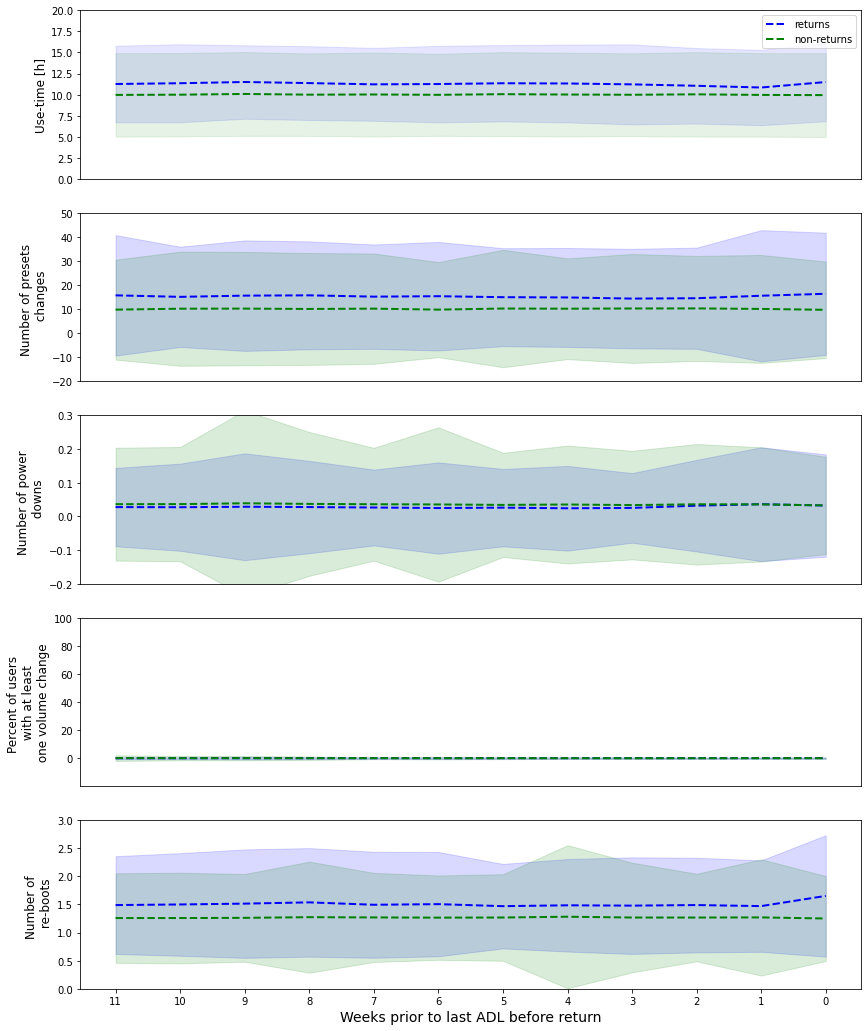

In [111]:
fig, ax = plt.subplots(5,1, figsize = (14,18))

#use-time
idx = 0
ax[idx].plot(mean1[idx], color = 'b',linewidth = 2, linestyle = '--',label = 'returns')
ax[idx].plot(mean2[idx], color = 'g', linewidth = 2, linestyle = '--',label = 'non-returns') 
ax[idx].fill_between(range(0,12), mean1[idx]-std1[idx], mean1[idx] + std1[idx], alpha = 0.1, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx]-std2[idx], mean2[idx] + std2[idx], alpha = 0.1, color = 'g')
ax[idx].set_xticks([])
ax[idx].set_ylim([0, 20])
ax[idx].set_ylabel('Use-time [h]', fontsize = 12)
ax[idx].legend()

#Presets 
idx = 1
ax[idx].plot(mean1[idx], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx]-std1[idx], mean1[idx] + std1[idx], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx]-std2[idx], mean2[idx] + std2[idx], alpha = 0.15, color = 'g')
ax[idx].set_xticks([])
ax[idx].set_ylim([-20, 50])
ax[idx].set_ylabel('Number of presets \n changes', fontsize = 12)


#Power downs
idx = 2
ax[idx].plot(mean1[idx], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx]-std1[idx], mean1[idx] + std1[idx], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx]-std2[idx], mean2[idx] + std2[idx], alpha = 0.15, color = 'g')
ax[idx].set_xticks([])
ax[idx].set_ylim([-0.2, 0.3])
ax[idx].set_ylabel('Number of power \n downs', fontsize = 12)

#Volume changes
idx = 3
ax[idx].plot(mean1[idx], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx]-std1[idx], mean1[idx] + std1[idx], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx]-std2[idx], mean2[idx] + std2[idx], alpha = 0.15, color = 'g')
ax[idx].set_xticks([])
ax[idx].set_ylim([-0.2, 0.1])
ax[idx].set_ylabel('Percent of users \n with at least \n one volume change ', fontsize = 12)
ax[idx].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[idx].set_yticklabels([0, 20, 40, 60, 80, 100])

#Re-boots
idx = 4
ax[idx].plot(mean1[idx], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx]-std1[idx], mean1[idx] + std1[idx], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx]-std2[idx], mean2[idx] + std2[idx], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_xlabel('Weeks prior to last ADL before return',fontsize = 14)
ax[idx].set_ylim([0, 3])
ax[idx].set_ylabel('Number of \n re-boots', fontsize = 12)



Text(0, 0.5, &#39;Loud Noise&#39;)

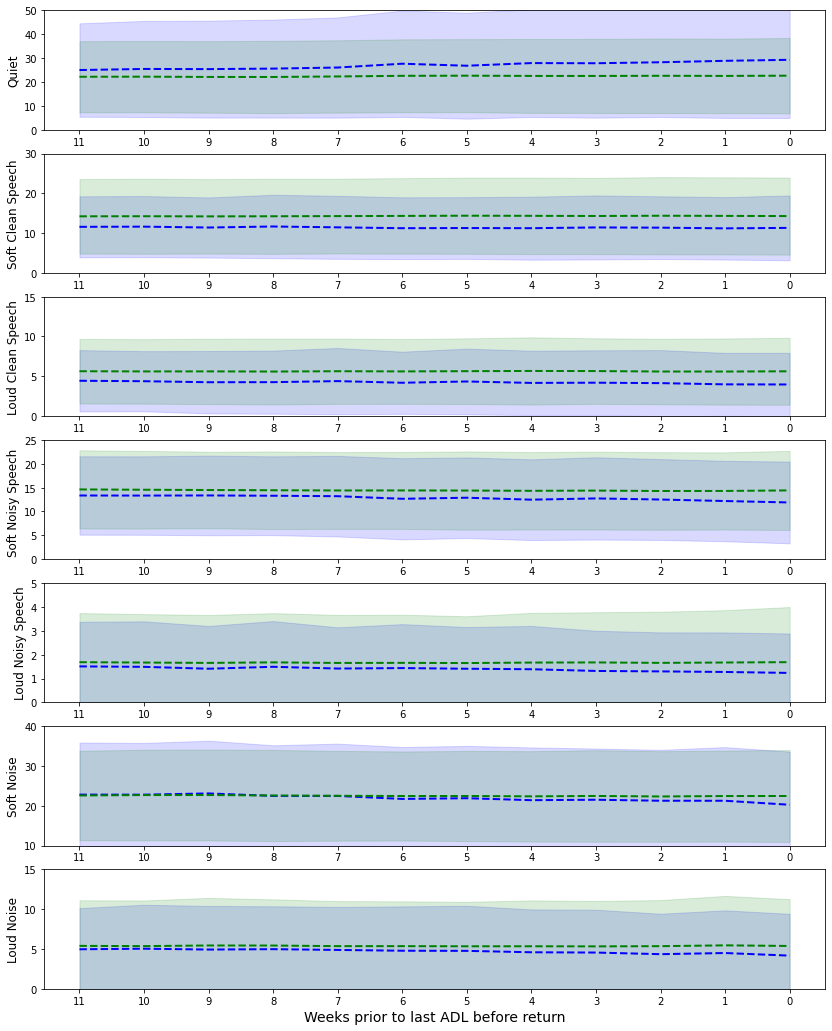

In [128]:
#now for the environments
fig, ax = plt.subplots(7,1, figsize = (14,18))

#env0 
idx = 0
ax[idx].plot(mean1[idx + 5] , color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 5] , color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 5]-std1[idx + 5], mean1[idx + 5] + std1[idx + 5], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 5]-std2[idx + 5], mean2[idx + 5] + std2[idx + 5], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([0, 50])
ax[idx].set_ylabel('Quiet', fontsize = 12)



#env1
idx = 1
ax[idx].plot(mean1[idx + 5], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 5], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 5]-std1[idx + 5], mean1[idx + 5] + std1[idx + 5], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 5]-std2[idx + 5], mean2[idx + 5] + std2[idx + 5], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([0, 30])
ax[idx].set_ylabel('Soft Clean Speech', fontsize = 12)

#env2
idx = 2
ax[idx].plot(mean1[idx + 5], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 5], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 5]-std1[idx + 5], mean1[idx + 5] + std1[idx + 5], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 5]-std2[idx + 5], mean2[idx + 5] + std2[idx + 5], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([0, 15])
ax[idx].set_ylabel('Loud Clean Speech', fontsize = 12)

#env3
idx = 3
ax[idx].plot(mean1[idx + 5], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 5], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 5]-std1[idx + 5], mean1[idx + 5] + std1[idx + 5], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 5]-std2[idx + 5], mean2[idx + 5] + std2[idx + 5], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([0, 25])
ax[idx].set_ylabel('Soft Noisy Speech ', fontsize = 12)


#env4
idx = 4
ax[idx].plot(mean1[idx + 5], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 5], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 5]-std1[idx + 5], mean1[idx + 5] + std1[idx + 5], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 5]-std2[idx + 5], mean2[idx + 5] + std2[idx + 5], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([0, 5])
ax[idx].set_ylabel('Loud Noisy Speech', fontsize = 12)


#env5
idx = 5
ax[idx].plot(mean1[idx + 5], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 5], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 5]-std1[idx + 5], mean1[idx + 5] + std1[idx + 5], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 5]-std2[idx + 5], mean2[idx + 5] + std2[idx + 5], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([10, 40])
ax[idx].set_ylabel('Soft Noise', fontsize = 12)


#env6
idx = 6
ax[idx].plot(mean1[idx + 5], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 5], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 5]-std1[idx + 5], mean1[idx + 5] + std1[idx + 5], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 5]-std2[idx + 5], mean2[idx + 5] + std2[idx + 5], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_xlabel('Weeks prior to last ADL before return',fontsize = 14)
ax[idx].set_ylim([0, 15])
ax[idx].set_ylabel('Loud Noise', fontsize = 12)




In [126]:
mean2[0 + 5] / mean2[0 + 5][0] * 100 - 100 

array([ 0.        ,  0.19360786, -0.34296611, -0.38635558,  0.59990704,
        1.7976488 ,  2.05190495,  1.60469213,  1.55492709,  1.86418364,
        1.62814666,  2.07153573])

Text(0, 0.5, &#39;90-100 dB&#39;)

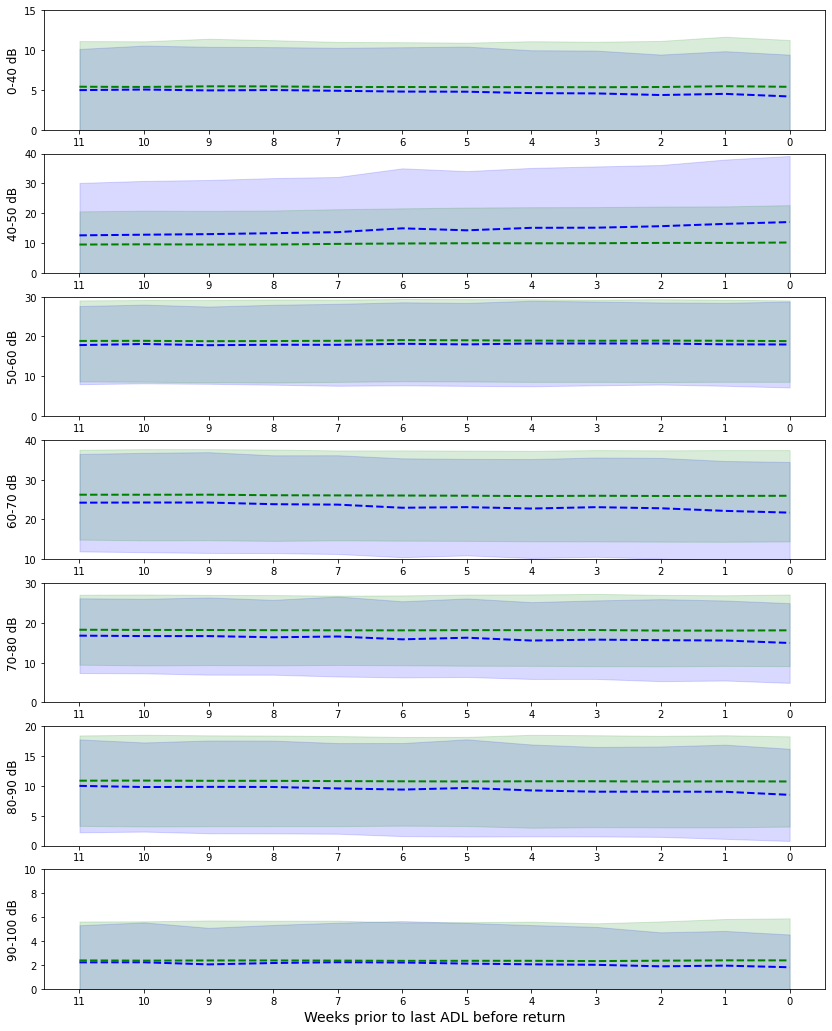

In [127]:
#now for the input levels
fig, ax = plt.subplots(7,1, figsize = (14,18))

#env0 
idx = 0
ax[idx].plot(mean1[idx + 11], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 11], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 11]-std1[idx + 11], mean1[idx + 11] + std1[idx + 11], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 11]-std2[idx + 11], mean2[idx + 11] + std2[idx + 11], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([0, 15])
ax[idx].set_ylabel('0-40 dB', fontsize = 12)


#env1
idx = 1
ax[idx].plot(mean1[idx + 11], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 11], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 11]-std1[idx + 11], mean1[idx + 11] + std1[idx + 11], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 11]-std2[idx + 11], mean2[idx + 11] + std2[idx + 11], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([0, 40])
ax[idx].set_ylabel('40-50 dB', fontsize = 12)

#env2
idx = 2
ax[idx].plot(mean1[idx + 11], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 11], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 11]-std1[idx + 11], mean1[idx + 11] + std1[idx + 11], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 11]-std2[idx + 11], mean2[idx + 11] + std2[idx + 11], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([0, 30])
ax[idx].set_ylabel('50-60 dB', fontsize = 12)

#env3
idx = 3
ax[idx].plot(mean1[idx + 11], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 11], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 11]-std1[idx + 11], mean1[idx + 11] + std1[idx + 11], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 11]-std2[idx + 11], mean2[idx + 11] + std2[idx + 11], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([10, 40])
ax[idx].set_ylabel('60-70 dB', fontsize = 12)


#env4
idx = 4
ax[idx].plot(mean1[idx + 11], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 11], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 11]-std1[idx + 11], mean1[idx + 11] + std1[idx + 11], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 11]-std2[idx + 11], mean2[idx + 11] + std2[idx + 11], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([0, 30])
ax[idx].set_ylabel('70-80 dB', fontsize = 12)


#env5
idx = 5
ax[idx].plot(mean1[idx + 11], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 11], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 11]-std1[idx + 11], mean1[idx + 11] + std1[idx + 11], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 11]-std2[idx + 11], mean2[idx + 11] + std2[idx + 11], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_ylim([0, 20])
ax[idx].set_ylabel('80-90 dB', fontsize = 12)


#env6
idx = 6
ax[idx].plot(mean1[idx + 11], color = 'b',linewidth = 2, linestyle = '--')
ax[idx].plot(mean2[idx + 11], color = 'g', linewidth = 2, linestyle = '--') 
ax[idx].fill_between(range(0,12), mean1[idx + 11]-std1[idx + 11], mean1[idx + 11] + std1[idx + 11], alpha = 0.15, color = 'b')
ax[idx].fill_between(range(0,12), mean2[idx + 11]-std2[idx + 11], mean2[idx + 11] + std2[idx + 11], alpha = 0.15, color = 'g')
ax[idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[idx].set_xticklabels([11, 10, 9, 8, 7, 6, 5,4,3,2,1,0])
ax[idx].set_xlabel('Weeks prior to last ADL before return',fontsize = 14)
ax[idx].set_ylim([0, 10])
ax[idx].set_ylabel('90-100 dB', fontsize = 12)




In [114]:
#now try to do the logistic regression for return prediction (prepare data)
X_ = np.concatenate([plot_data_1_, 
                     plot_data_2_,
                     plot_data_3_,
                     plot_data_4_,
                     plot_data_5_],axis=1)
Y_ = class_labels_array_
data_names = np.array(['Use_time_%d' % i for i in range(11,-1,-1)] + \
                      ['Presets_%d' % i for i in range(11,-1,-1)] + \
['Power_downs_%d' % i for i in range(11,-1,-1)] + \
                      ['Volume_changes_%d' % i for i in range(11,-1,-1)] + \
['re-boots_%d' % i for i in range(11,-1,-1)])
                     

In [115]:
Y_

array([1., 1., 1., ..., 0., 0., 0.])

In [116]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_,X_)
result=logit_model.fit()
print(result.summary2())

ModuleNotFoundError: No module named &#39;statsmodels&#39;

In [758]:
np.exp(result.params[result.pvalues < 0.05])

array([1.03760446, 0.96435456, 1.03840691, 0.94152744, 0.97036249,
       1.00533792, 1.00718678, 0.99591927, 0.99486322, 1.00592587,
       1.68686717, 0.39773464, 1.9264013 , 0.87140629, 0.83658722,
       1.20197405, 0.79259445, 1.49739845, 0.75065344, 1.24471063,
       0.71957942, 1.29533014, 0.84946119, 1.97969033])

In [759]:
idx = np.where(result.pvalues < 0.05)

In [760]:
(data_names[idx],np.exp(result.params[result.pvalues < 0.05]))

(array(['Use_time_9', 'Use_time_7', 'Use_time_5', 'Use_time_1',
        'Use_time_0', 'Presets_11', 'Presets_9', 'Presets_7', 'Presets_3',
        'Presets_0', 'Power_downs_9', 'Power_downs_6', 'Power_downs_1',
        'Volume_changes_11', 'Volume_changes_10', 'Volume_changes_5',
        'Volume_changes_4', 'Volume_changes_3', 're-boots_9', 're-boots_6',
        're-boots_5', 're-boots_2', 're-boots_1', 're-boots_0'],
       dtype='<U17'),
 array([1.03760446, 0.96435456, 1.03840691, 0.94152744, 0.97036249,
        1.00533792, 1.00718678, 0.99591927, 0.99486322, 1.00592587,
        1.68686717, 0.39773464, 1.9264013 , 0.87140629, 0.83658722,
        1.20197405, 0.79259445, 1.49739845, 0.75065344, 1.24471063,
        0.71957942, 1.29533014, 0.84946119, 1.97969033]))

In [761]:
X_CNN = np.array([plot_data_1_.flatten(), 
plot_data_2_.flatten(),
plot_data_3_.flatten(),
plot_data_4_.flatten(),
plot_data_5_.flatten()]).transpose()

In [762]:
plot_data_1_.shape

(8000, 12)

In [763]:
#get the right format for the inputs 
X_CNN = X_CNN.reshape(int(X_CNN.shape[0] / 12), 12, 5)
#Y_CNN = np.zeros((Y_.shape[0],1))
#Y_CNN[np.where(Y_ == 1)] = 1

In [764]:
Y_

array([1., 1., 1., ..., 0., 0., 0.])

In [765]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras import models

In [766]:
Y_.shape

(8000,)

In [767]:
#now one-hot encode
Y_OHC = to_categorical(Y_)

In [768]:
#make train, test data
trainX, testX, trainY, testY = train_test_split(X_CNN, Y_OHC, test_size=0.20, random_state=0)
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainY.shape[1]

In [769]:
#try an easy 1D conv 
model = Sequential()
model.add(Conv1D(16,4, activation = 'relu',  input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5)) 
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()
        

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_23 (Conv1D)           (None, 9, 16)             336       
_________________________________________________________________
dropout_23 (Dropout)         (None, 9, 16)             0         
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 4, 16)             0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 130       
Total params: 466
Trainable params: 466
Non-trainable params: 0
_________________________________________________________________


In [787]:
#model fitting
clf = model.fit(trainX, trainY, epochs=20, batch_size=32, validation_split = 0.2)

Train on 5120 samples, validate on 1280 samples
Epoch 1/20
5120/5120 [==============================] - 1s 109us/step - loss: 0.2288 - accuracy: 0.6084 - val_loss: 0.2288 - val_accuracy: 0.5914
Epoch 2/20
5120/5120 [==============================] - 1s 99us/step - loss: 0.2279 - accuracy: 0.6102 - val_loss: 0.2266 - val_accuracy: 0.6164
Epoch 3/20
5120/5120 [==============================] - 0s 92us/step - loss: 0.2289 - accuracy: 0.6092 - val_loss: 0.2277 - val_accuracy: 0.6148
Epoch 4/20
5120/5120 [==============================] - 1s 109us/step - loss: 0.2287 - accuracy: 0.6100 - val_loss: 0.2264 - val_accuracy: 0.6258
Epoch 5/20
5120/5120 [==============================] - 1s 98us/step - loss: 0.2293 - accuracy: 0.6016 - val_loss: 0.2248 - val_accuracy: 0.6336
Epoch 6/20
5120/5120 [==============================] - 1s 109us/step - loss: 0.2289 - accuracy: 0.6064 - val_loss: 0.2262 - val_accuracy: 0.6125
Epoch 7/20
5120/5120 [==============================] - 1s 107us/step - loss: 0

In [788]:
model.evaluate(testX,testY,verbose=1)

1600/1600 [==============================] - 0s 62us/step


[0.22420478671789168, 0.6337500214576721]

In [789]:
testY

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

Text(0, 0.5, 'True Positives')

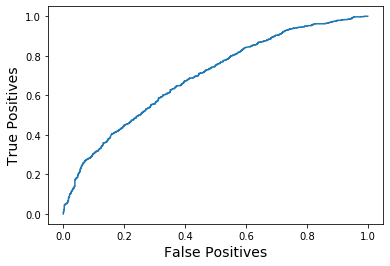

In [790]:
#plot ROC curve 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
y_pred_keras = model.predict(testX).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(testY.ravel(), y_pred_keras)

plt.plot(fpr_keras, tpr_keras)
plt.xlabel('False Positives',fontsize=14)
plt.ylabel('True Positives',fontsize=14)

Text(0.5, 0, 'Predicted Class')

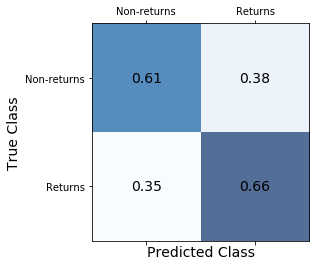

In [791]:
#now plot the cofusion matrix 
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(testY[:,1], model.predict_classes(testX))
cfm_norm = np.around(cfm / cfm.sum(axis=1),2)

#nicer confusion matrix
fig, ax = plt.subplots(figsize = (4, 4))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center',ha='center', fontsize = 14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Non-returns','Returns'])
ax.set_yticklabels(['Non-returns','Returns'])

ax.set_ylabel('True Class',fontsize=14)
ax.set_xlabel('Predicted Class',fontsize=14)


In [775]:
cfm

array([[523, 267],
       [364, 446]], dtype=int64)

In [776]:
testY.ravel().shape, model.predict_classes(testX).ravel().shape


((3200,), (1600,))

# Now try the k-nearest neighbor approach 

In [777]:
#now prepare data for k-nearest neighbors 
X_KNN = X_CNN.reshape(X_CNN.shape[0],X_CNN.shape[1] * X_CNN.shape[2])
Y_KNN = Y_

trainX_KNN, testX_KNN, trainY_KNN, testY_KNN = train_test_split(X_KNN, Y_KNN, test_size=0.20, random_state=0)

In [778]:
(trainX_KNN.shape, trainY_KNN.shape)

((6400, 60), (6400,))

In [779]:
#now try to use a k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier


In [780]:
#now train the model (fill memory with training data)
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(trainX_KNN, trainY_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [781]:
knn.score(testX_KNN, testY_KNN)

0.726875

Text(0.5, 0, 'Predicted Class')

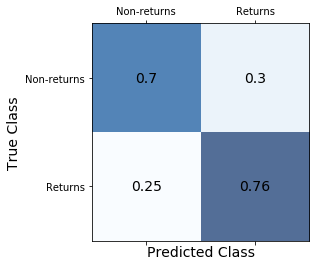

In [782]:
#now plot the cofusion matrix 
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(testY_KNN, knn.predict(testX_KNN))
cfm_norm = np.around(cfm / cfm.sum(axis=1),2)

#nicer confusion matrix
fig, ax = plt.subplots(figsize = (4, 4))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center',ha='center', fontsize = 14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Non-returns','Returns'])
ax.set_yticklabels(['Non-returns','Returns'])

ax.set_ylabel('True Class',fontsize=14)
ax.set_xlabel('Predicted Class',fontsize=14)


In [783]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, testX_KNN, testY_KNN, cv=10)
cv_scores

array([0.60625, 0.54375, 0.55   , 0.51875, 0.6375 , 0.61875, 0.60625,
       0.6375 , 0.58125, 0.6    ])

In [784]:
#
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(3, 20)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(testX_KNN, testY_KNN)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [785]:
(knn_gscv.best_params_, knn_gscv.best_score_)

({'n_neighbors': 3}, 0.655625)

Text(0, 0.5, 'True Positives')

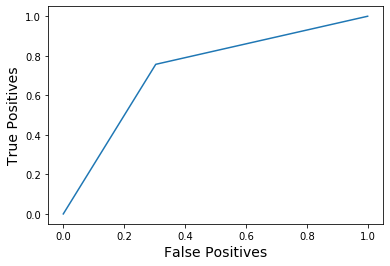

In [786]:
#roc curve for knn
y_pred_knn = knn.predict(testX_KNN)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(testY_KNN, y_pred_knn)

plt.plot(fpr_knn, tpr_knn)
plt.xlabel('False Positives',fontsize=14)
plt.ylabel('True Positives',fontsize=14)

In [50]:
for idx in range(6,20):
    print(idx)


6
7
8
9
10
11
12
13
14
15
16
17
18
19
